<a href="https://colab.research.google.com/github/AryanKumar2802/DataScienceBootcaamp/blob/main/Zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Assuming the file is in a subdirectory called 'data'
# Corrected path if the file is directly in the notebook directory
# restaurant = pd.read_csv('data/zomato.csv', encoding="iso-8859-1")
restaurant = pd.read_csv('zomato.csv', encoding="iso-8859-1")
countrycode = pd.read_excel('Country-Code.xlsx')

In [ ]:
restaurant.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
restaurant.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
merged_data = pd.merge(restaurant, countrycode, on='Country Code', how='left')

In [ ]:
# Check for missing values
print(merged_data.isnull().sum())

# Example: Drop rows with missing values in a specific column (e.g., 'Cuisines')
# merged_data.dropna(subset=['Cuisines'], inplace=True)

# Example: Fill missing values in a column (e.g., 'Rating color') with a placeholder
# merged_data['Rating color'].fillna('Unknown', inplace=True)

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64


In [ ]:
# Check for duplicate rows
print(merged_data.duplicated().sum())

# Drop duplicate rows
# merged_data.drop_duplicates(inplace=True)

0


In [ ]:
# Check data types
print(merged_data.info())

# Example: Convert a column to numeric if necessary
# merged_data['Average Cost for two'] = pd.to_numeric(merged_data['Average Cost for two'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
# Filter data for India
india_data = merged_data[merged_data['Country'] == 'India']

# Sort data by rating and votes
sorted_india_data = india_data.sort_values(by=['Aggregate rating', 'Votes'], ascending=[False, False])

# Get the top restaurant in each city
top_restaurants_india = sorted_india_data.groupby('City').head(1)

# Display the result
print(top_restaurants_india[['Restaurant Name', 'City', 'Aggregate rating', 'Votes']])

                        Restaurant Name          City  Aggregate rating  Votes
2414                    Barbeque Nation       Kolkata               4.9   5966
2307          AB's - Absolute Barbecues     Hyderabad               4.9   5434
2495                    Mirchi And Mime        Mumbai               4.9   3244
3013                 Naturals Ice Cream     New Delhi               4.9   2620
2418          Grandson of Tunday Kababi       Lucknow               4.9   1057
822           AB's - Absolute Barbecues       Chennai               4.9    859
2289                    Barbeque Nation      Guwahati               4.9    774
748               Sagar Gaire Fast Food        Bhopal               4.9    427
9262                    Barbeque Nation         Vizag               4.9    345
2350      Zolocrust - Hotel Clarks Amer        Jaipur               4.9    322
2536                    Barbeque Nation        Nagpur               4.9    226
1381                        Caterspoint       Gurgao

Correlation between Aggregate rating and Votes: 0.31


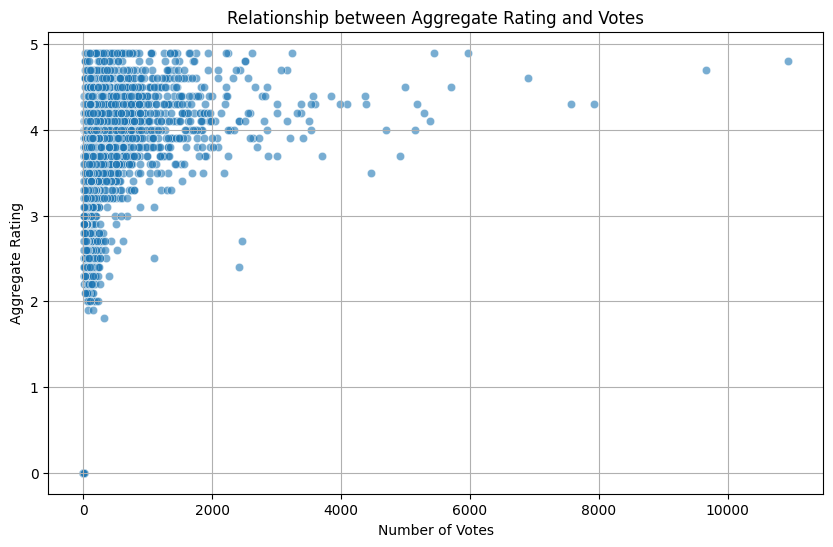

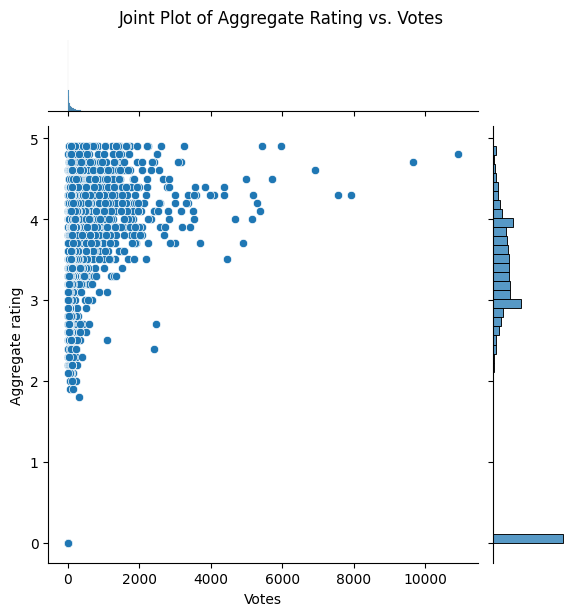

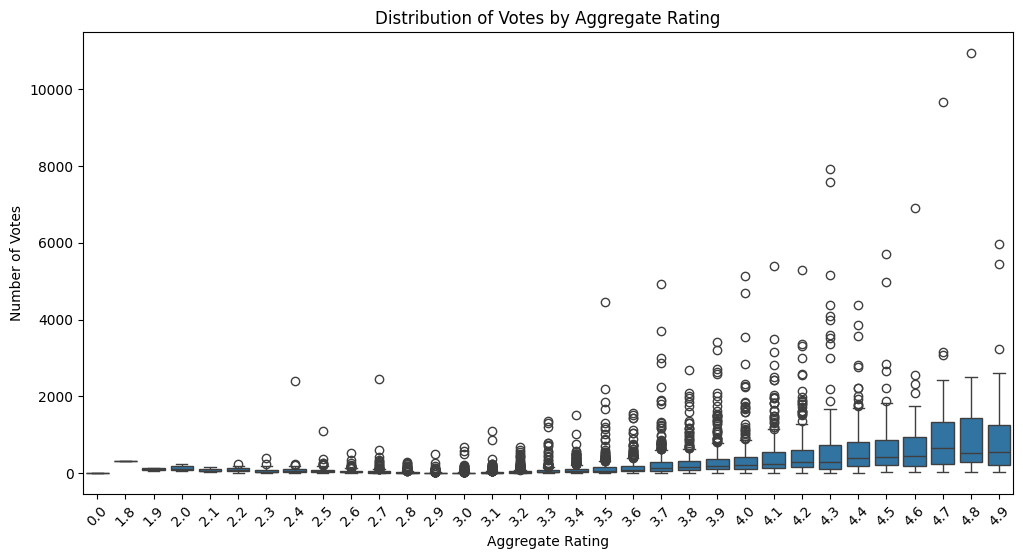

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_data is already loaded and merged as in your previous code
# merged_data = pd.merge(restaurant, countrycode, on='Country Code', how='left')

# 1. Calculate the correlation coefficient
# This gives a single value indicating the strength and direction of a linear relationship
# A value close to 1 means a strong positive linear relationship
# A value close to -1 means a strong negative linear relationship
# A value close to 0 means a weak or no linear relationship
correlation = merged_data['Aggregate rating'].corr(merged_data['Votes'])
print(f"Correlation between Aggregate rating and Votes: {correlation:.2f}")

# 2. Create a scatter plot to visualize the relationship
# A scatter plot is useful for seeing the pattern and identifying outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Votes', y='Aggregate rating', alpha=0.6)
plt.title('Relationship between Aggregate Rating and Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

# 3. Create a joint plot for a more detailed visualization
# A joint plot shows the scatter plot along with histograms of each variable
sns.jointplot(data=merged_data, x='Votes', y='Aggregate rating', kind='scatter')
plt.suptitle('Joint Plot of Aggregate Rating vs. Votes', y=1.02)
plt.show()

# 4. Consider visualizing the relationship for specific rating levels
# You can group by rating and look at the distribution of votes
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Aggregate rating', y='Votes')
plt.title('Distribution of Votes by Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()



In [24]:
country_counts = merged_data['Country'].value_counts()
print(country_counts)

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
South Africa        60
UAE                 60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Qatar               20
Singapore           20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


In [25]:
DelhiTopOnline=india_data[india_data['Has Online delivery']=='Yes']
DelhiTopOnline.head()



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
646,18396250,Huber & Holly,1,Ahmedabad,"7 B, Circle B, Opposite Rajpath Club, Sarkhej...",Bodakdev,"Bodakdev, Ahmedabad",72.512395,23.038311,"Ice Cream, Desserts, Continental",...,No,Yes,No,No,1,4.5,Dark Green,Excellent,217,India
648,113433,Fozzie's Pizzaiolo,1,Ahmedabad,"Ground Floor, Maruti Crystal, Opposite Rajpath...",Bodakdev,"Bodakdev, Ahmedabad",72.509806,23.033069,"Pizza, Italian, Beverages, Desserts",...,No,Yes,No,No,3,4.3,Green,Very Good,731,India
649,18438909,La Pino'z Pizza,1,Ahmedabad,"Shop 10, Circle B, Nyay Marg, Bodakdev, Ahmed...",Bodakdev,"Bodakdev, Ahmedabad",72.512487,23.038231,"Pizza, Italian",...,No,Yes,No,No,2,4.4,Green,Very Good,113,India
650,18143128,Mocha,1,Ahmedabad,"6-9, Ground Floor, Devashish Business Park, Op...",Bodakdev,"Bodakdev, Ahmedabad",72.511307,23.031851,"Cafe, Continental, Desserts",...,No,Yes,No,No,3,4.4,Green,Very Good,944,India
651,18438944,Blue - Rooftop Cafe Restaurant Bistro,1,Ahmedabad,"10th Floor, Balaji Heights Buliding, Behind Ta...",C G Road,"C G Road, Ahmedabad",72.557037,23.029062,"North Indian, Cafe, Italian, Mexican, Continental",...,No,Yes,No,No,3,3.8,Yellow,Good,63,India


In [26]:
agra_data = india_data[india_data['City'] == 'Agra']

agra_online_delivery = agra_data[agra_data['Has Online delivery'] == 'Yes']

cities_with_online_delivery_in_agra = agra_online_delivery['City'].unique()

print("Cities in Agra with online delivery:")
for city in cities_with_online_delivery_in_agra:
    print(city)

Cities in Agra with online delivery:


In [27]:
gurgaon_data = india_data[india_data['City'] == 'Gurgaon']

gurgaon_online_delivery = gurgaon_data[gurgaon_data['Has Online delivery'] == 'Yes']

top_gurgaon_restaurants = gurgaon_online_delivery.sort_values(by='Aggregate rating', ascending=False)

top_5_gurgaon_restaurants = top_gurgaon_restaurants.head(5)

print("Top 5 restaurants in Gurgaon with online delivery and good ratings:")
print(top_5_gurgaon_restaurants[['Restaurant Name', 'Aggregate rating']])

Top 5 restaurants in Gurgaon with online delivery and good ratings:
        Restaurant Name  Aggregate rating
1381        Caterspoint               4.9
1312             Twigly               4.6
1478            Dudleys               4.6
1893             Twigly               4.5
2099  Indian Grill Room               4.5


In [ ]:
noida_data=india_data[india_data['City']=='Noida']
noida_online_delivery=noida_data[noida_data['Has Online delivery']=='Yes']
top_noida_restaurants=noida_online_delivery.sort_values(by='Aggregate rating',ascending=False)
top_5_noida_restaurants=top_noida_restaurants.head(5)
print("top 5 restaurants in noida with online delivery and good ratings:")
print(top_5_noida_restaurants[['Restaurant Name','Aggregate rating']])

top 5 restaurants in noida with online delivery and good ratings:
               Restaurant Name  Aggregate rating
8757  Kalpak Restaurant & Cafe               4.3
8602                 Desi Swag               4.3
8072                  Mamagoto               4.3
8468           Mad Over Donuts               4.2
8076            The Bento Cafe               4.2


In [28]:
city_name = 'New Delhi'

city_data = merged_data[merged_data['City'] == city_name]

average_cost_threshold = 500
rating_threshold = 4.0

cheap_and_best_restaurants = city_data[
    (city_data['Average Cost for two'] <= average_cost_threshold) &
    (city_data['Aggregate rating'] >= rating_threshold)
]

sorted_cheap_and_best = cheap_and_best_restaurants.sort_values(by='Aggregate rating', ascending=False)

print(f"Cheap and best restaurants in {city_name}:")
print(sorted_cheap_and_best[['Restaurant Name', 'Average Cost for two', 'Aggregate rating']])

Cheap and best restaurants in New Delhi:
                   Restaurant Name  Average Cost for two  Aggregate rating
3013            Naturals Ice Cream                   150               4.9
6657            Naturals Ice Cream                   150               4.7
2904  Kuremal Mohan Lal Kulfi Wale                   200               4.5
3944             Natural Ice Cream                   150               4.5
4354             Natural Ice Cream                   150               4.5
...                            ...                   ...               ...
6846                      Hornbill                   400               4.0
7039                Frosty Rollies                   250               4.0
7085                  Krispy Kreme                   350               4.0
7294                     Ever Bake                   350               4.0
7867            Wake 'n' Bake Cafe                   350               4.0

[77 rows x 3 columns]
